In [1]:
import splat as sp
import joblib
import sklearn
import seaborn as sns
from astropy.io import fits
from zipfile import ZipFile
import matplotlib.pyplot as plt



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
from multioutput_functions import *

In [3]:
rf_low   = joblib.load('RFclassifiers/RF_low.joblib')
rf_low_T = joblib.load('RFclassifiers/RF_low_T.joblib')
rf_mid   = joblib.load('RFclassifiers/RF_mid.joblib')
rf_mid_T = joblib.load('RFclassifiers/RF_mid_T.joblib')
rf_hig   = joblib.load('RFclassifiers/RF_hig.joblib')
rf_hig_T = joblib.load('RFclassifiers/RF_hig_T.joblib')

In [4]:
rf_low_G1   = joblib.load('RFclassifiers/RF_low_G1.joblib')
rf_low_T_G1 = joblib.load('RFclassifiers/RF_low_T_G1.joblib')
# rf_mid_G1   = joblib.load('RFclassifiers/RF_mid_G1.joblib')
# rf_mid_T_G1 = joblib.load('RFclassifiers/RF_mid_T_G1.joblib')
# rf_hig_G1   = joblib.load('RFclassifiers/RF_hig_G1.joblib')
# rf_hig_T_G1 = joblib.load('RFclassifiers/RF_hig_T_G1.joblib')

rf_low_G2   = joblib.load('RFclassifiers/RF_low_G2.joblib')
rf_low_T_G2 = joblib.load('RFclassifiers/RF_low_T_G2.joblib')
# rf_mid_G2   = joblib.load('RFclassifiers/RF_mid_G2.joblib')
# rf_mid_T_G2 = joblib.load('RFclassifiers/RF_mid_T_G2.joblib')
# rf_hig_G2   = joblib.load('RFclassifiers/RF_hig_G2.joblib')
# rf_hig_T_G2 = joblib.load('RFclassifiers/RF_hig_T_G2.joblib')

rf_low_G3   = joblib.load('RFclassifiers/RF_low_G3.joblib')
rf_low_T_G3 = joblib.load('RFclassifiers/RF_low_T_G3.joblib')
# rf_mid_G3   = joblib.load('RFclassifiers/RF_mid_G3.joblib')
# rf_mid_T_G3 = joblib.load('RFclassifiers/RF_mid_T_G3.joblib')
# rf_hig_G3   = joblib.load('RFclassifiers/RF_hig_G3.joblib')
# rf_hig_T_G3 = joblib.load('RFclassifiers/RF_hig_T_G3.joblib')

In [3]:
mo_low = joblib.load('MOclassifiers/MO_low.pkl')
mo_mid = joblib.load('MOclassifiers/MO_mid.pkl')
mo_hig = joblib.load('MOclassifiers/MO_hig.pkl')
mo_low_d = joblib.load('MOclassifiers/MO_low_d.pkl')
mo_mid_d = joblib.load('MOclassifiers/MO_mid_d.pkl')
mo_hig_d = joblib.load('MOclassifiers/MO_hig_d.pkl')
mo_low_T = joblib.load('MOclassifiers/MO_low_T.pkl')
mo_mid_T = joblib.load('MOclassifiers/MO_mid_T.pkl')
mo_hig_T = joblib.load('MOclassifiers/MO_hig_T.pkl')
mo_low_d_T = joblib.load('MOclassifiers/MO_low_d_T.pkl')
mo_mid_d_T = joblib.load('MOclassifiers/MO_mid_d_T.pkl')
mo_hig_d_T = joblib.load('MOclassifiers/MO_hig_d_T.pkl')

In [5]:
singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/single_spectra_with_synthphot.h5')
wave = singles['WAVEGRID'][0]
wavegrid_list=list(wave)
wave = np.array(wave)
wavegrid=wave

In [6]:
dic_b = {'primary_type': [i for i in list(range(16,40)) for j in range(16,40)],
         'secondary_type': [i for j in range(16,40) for i in list(range(16,40))]}
types_df = pd.DataFrame(dic_b)
types_df = types_df.loc[types_df['primary_type']<=types_df['secondary_type']].reset_index(drop=True)
types_count = types_df.groupby('secondary_type').primary_type.value_counts().unstack()

# df = pd.read_hdf(r'C:/Users/juand/Research/h5_files/standards.h5')
# STANDARDS = {
#     "WAVE": df["wavegrid"].iloc[0],
#     "SPT": df["sptype"],
#     "FLUX": df["interpolated_flux"],
#     "UNC": df["interpolated_noise"],
# }

In [7]:
bardalez_stars = ['J1707-0138','J1623-0508','J1422+2215','J1059-2113','J1036-3441','J0427-1127','J0206+2235','J2026-2943',
                 'J1453+1420','J1341-3052','J1311+3629','J0931+2802','J0236+0048']
burgasser_stars= ['J0247-1631','J0351+4810','J1039+3256','J1106+2754','J1324+6358','J1415+5724','J1435+1129','J1439+3042',
                 'J1511+0607','J1516+0259','J1711+2232','J2139+0220','J0119+2403','J0758+3247','J0909+6525','J0949-1545',
                 'J1206+2813','J1207+0244','J1516+3053','J2052-1609']
bardalez_prim  = [21.5,27.5,24.6,21.5,25.1,17.2,24.3,19.9,21.1,21.6,24.4,21.4,25.5]
burgasser_prim = [27.5,26,28,27.5,29,27.5,28,20,25,26.5,25,29.5,20,27.5,21.5,31,32,26.5,29,27]
bardalez_sec   = [33,35.5,31.6,32.3,31.1,32.5,31.5,35.9,36,36.5,32,31,31.5]
burgasser_sec  = [36.5,34.5,34,34.5,34,35.5,36,35.5,35.5,32.5,35.5,34,34,34,32.5,32,35,33,29.5,32]

In [8]:
len(bardalez_stars)+len(burgasser_stars)

33

In [40]:
def splat_MOclass(star,prim,sec,performance=False,many=100,model=1):
    tm = np.logical_or(np.logical_and(wave > 1.35,wave < 1.42), np.logical_and(wave > 1.8,wave < 1.95))
    
    sp0=sp.getSpectrum(shortname=star)[0]
    sp0.plot()
    wave0  = sp0.wave.value
    flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
    noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
    flux0, noise0 = normalize(wave, flux0, noise0)
    fluxT = flux0[~tm]
    noiseT = noise0[~tm]
    spt_num = typeToNum(fast_classify(wave,flux0,noise0))
    spt_num = round(spt_num)
    type_position = []
    for position in range(len(STANDARDS['SPT'])):
        if int(typeToNum(STANDARDS['SPT'][position]))==spt_num:
            type_position.append(position)
    type_position = type_position[0]
    flux_standard = STANDARDS["FLUX"][type_position]
    diff = flux_standard - flux0
    diffT = diff[~tm]
    fluxanddiff = np.array(list(flux0)+list(diff))
    fluxanddiffT = np.array(list(fluxT)+list(diffT))
    SNR = measureSN(wave, flux0, noise0, rng=[1.2, 1.35])
    print('snr: '+str(SNR))
    print('star types: ' +str([prim, sec]))
    if SNR<50:
        print('MO low classification: ' +str(mo_low.predict([flux0])[0]))
        print('MO low Telluric class: ' +str(mo_low_T.predict([fluxT])[0]))
        print('MO low difference class: ' +str(mo_low_d.predict([fluxanddiff])[0]))
        print('MO low diff and T class: ' +str(mo_low_d_T.predict([fluxanddiffT])[0]))
    elif SNR>100:
        print('MO hig classification: ' +str(mo_hig.predict([flux0])[0]))
        print('MO hig Telluric class: ' +str(mo_hig_T.predict([fluxT])[0]))
        print('MO hig difference class: ' +str(mo_hig_d.predict([fluxanddiff])[0]))
        print('MO hig diff and T class: ' +str(mo_hig_d_T.predict([fluxanddiffT])[0]))
    else:
        print('MO mid classification: ' +str(mo_mid.predict([flux0])[0]))
        print('MO mid Telluric class: ' +str(mo_mid_T.predict([fluxT])[0]))
        print('MO mid difference class: ' +str(mo_mid_d.predict([fluxanddiff])[0]))
        print('MO mid diff and T class: ' +str(mo_mid_d_T.predict([fluxanddiffT])[0]))

    if performance:
        many  = 100
        preds = []
        diffprim = []
        diffsec = []
        for i in range(many):
            fluxN = np.array(addNoise(flux0,noise0)[0])
            if model==1:
                if SNR<50:
                    preds.append(mo_low.predict([fluxN])[0])
                elif SNR>100:
                    preds.append(mo_hig.predict([fluxN])[0])
                else:
                    preds.append(mo_mid.predict([fluxN])[0])
                diffprim.append(preds[-1][0] - prim)
                diffsec.append(preds[-1][1] - sec)
            elif model==2:
                fluxTN = fluxN[~tm]
                if SNR<50:
                    preds.append(mo_low_T.predict([fluxTN])[0])
                elif SNR>100:
                    preds.append(mo_hig_T.predict([fluxTN])[0])
                else:
                    preds.append(mo_mid_T.predict([fluxTN])[0])
                diffprim.append(preds[-1][0] - prim)
                diffsec.append(preds[-1][1] - sec)
            elif model==3:
                diffN = flux_standard - fluxN
                fluxanddiffN = np.array(list(fluxN)+list(diffN))
                if SNR<50:
                    preds.append(mo_low_d.predict([fluxanddiffN])[0])
                elif SNR>100:
                    preds.append(mo_hig_d.predict([fluxanddiffN])[0])
                else:
                    preds.append(mo_mid_d.predict([fluxanddiffN])[0])
                diffprim.append(preds[-1][0] - prim)
                diffsec.append(preds[-1][1] - sec)
            elif model==4:
                fluxTN = fluxN[~tm]
                diffN = flux_standard - fluxN
                diffTN = diffN[~tm]
                fluxanddiffTN = np.array(list(fluxTN)+list(diffTN))
                if SNR<50:
                    preds.append(mo_low_d_T.predict([fluxanddiffTN])[0])
                elif SNR>100:
                    preds.append(mo_hig_d_T.predict([fluxanddiffTN])[0])
                else:
                    preds.append(mo_mid_d_T.predict([fluxanddiffTN])[0])
                predssec = preds[-1][1]
                diffprim.append(preds[-1][0] - prim)
                diffsec.append(preds[-1][1] - sec)
            else:
                return print('Choose a model number between 1-4')

        diffprim=np.array(diffprim)
        diffsec=np.array(diffsec)
        avg_diffprim=sum(diffprim)/len(diffprim)
        avg_diffsec=sum(diffsec)/len(diffsec)
        std_diffprim=np.sqrt(sum(np.abs(diffprim-avg_diffprim)**2)/(len(diffprim)-1))
        std_diffsec=np.sqrt(sum(np.abs(diffsec-avg_diffsec)**2)/(len(diffsec)-1))

        performance_dic = {'avg_diffprim':round(avg_diffprim,3),
                           'avg_diffsec':round(avg_diffsec,3),
                           'std_diffprim':round(std_diffprim,3),
                           'std_diffsec':round(std_diffsec,3)}
        return performance_dic

In [11]:
def splat_RFclass(star,classif,model=1):
    tm = np.logical_or(np.logical_and(wave > 1.35,wave < 1.42), np.logical_and(wave > 1.8,wave < 1.95))
    
    sp0=sp.getSpectrum(shortname=star)[0]
    sp0.plot()
    wave0  = sp0.wave.value
    flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
    noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
    flux0, noise0 = normalize(wave, flux0, noise0)
    fluxT = flux0[~tm]
    noiseT = noise0[~tm]
    SNR = measureSN(wave, flux0, noise0, rng=[1.2, 1.35])
    fast_type = typeToNum(fast_classify(wave,flux0,noise0))
    print(star)
    print('snr: '+str(SNR))
    print('star classification: ' +str([fast_type]))
    if SNR<50:
        print('RF low classification: ' +str(rf_low.predict([flux0])[0]) + '\nThe probability is ' +str(rf_low.predict_proba([flux0])[0]))
        print('RF low Telluric class: ' +str(rf_low_T.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_low_T.predict_proba([fluxT])[0]))
        if (16<=fast_type<=27):
            print('RF low G1 classification: ' +str(rf_low_G1.predict([flux0])[0]) + '\nThe probability is ' +str(rf_low_G1.predict_proba([flux0])[0]))
            print('RF low Telluric G1 class: ' +str(rf_low_T_G1.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_low_T_G1.predict_proba([fluxT])[0]))
        elif (24<=fast_type<=32):
            print('RF low G2 classification: ' +str(rf_low_G2.predict([flux0])[0]) + '\nThe probability is ' +str(rf_low_G2.predict_proba([flux0])[0]))
            print('RF low Telluric G2 class: ' +str(rf_low_T_G2.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_low_T_G2.predict_proba([fluxT])[0]))
        elif (27<=fast_type<=37):
            print('RF low G3 classification: ' +str(rf_low_G3.predict([flux0])[0]) + '\nThe probability is ' +str(rf_low_G3.predict_proba([flux0])[0]))
            print('RF low Telluric G3 class: ' +str(rf_low_T_G3.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_low_T_G3.predict_proba([fluxT])[0]))
        pred = rf_low.predict([flux0])[0]
    elif SNR>100:
        print('RF hig classification: ' +str(rf_hig.predict([flux0])[0]) + '\nThe probability is ' +str(rf_hig.predict_proba([flux0])[0]))
        print('RF hig Telluric class: ' +str(rf_hig_T.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_hig_T.predict_proba([fluxT])[0]))
        pred = rf_hig.predict([flux0])[0]
    else:
        print('RF mid classification: ' +str(rf_mid.predict([flux0])[0]) + '\nThe probability is ' +str(rf_mid.predict_proba([flux0])[0]))
        print('RF mid Telluric class: ' +str(rf_mid_T.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_mid_T.predict_proba([fluxT])[0]))
        pred = rf_mid.predict([flux0])[0]
    print('\n')
    return pred
    

Bardalez stars


Retrieving 1 file



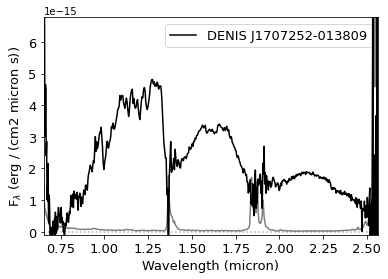

snr: 110.734535
star classification: [1]
RF hig classification: 0
The probability is [0.83 0.17]
RF hig Telluric class: 0
The probability is [0.84833333 0.15166667]


0

<Figure size 432x288 with 0 Axes>

In [9]:
splat_RFclass('J1707-0138',1,model=1)


Retrieving 1 file



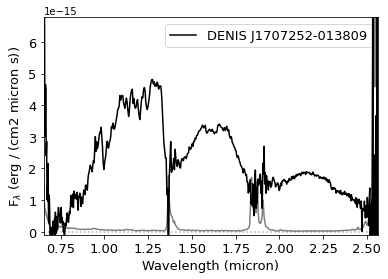

snr: 110.734535
star types: [21.5, 33]
MO hig classification: [20.99064314 28.28337053]
MO hig Telluric class: [20.99092714 29.00541442]
MO hig difference class: [20.60790252 29.23600679]
MO hig diff and T class: [20.65179313 29.38926094]


{'avg_diffprim': -0.525,
 'avg_diffsec': -4.126,
 'std_diffprim': 0.042,
 'std_diffsec': 0.661}

<Figure size 432x288 with 0 Axes>

In [41]:
splat_MOclass('J1707-0138',21.5,33,performance=True,model=1)


Retrieving 1 file



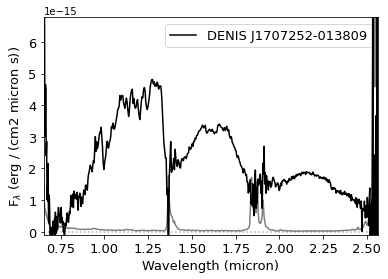

Bardalez types: [21.5, 33]
snr: 110.734535
multi output low classification: [20.94355876 31.58887969]
multi output mid classification: [20.98653608 29.93996555]
multi output hig classification: [20.99064314 28.28337053]
MO low Telluric class: [20.92376265 32.25155258]
MO mid Telluric class: [20.99138018 30.42726307]
MO hig Telluric class: [20.99092714 29.00541442]


<Figure size 432x288 with 0 Axes>

In [103]:
sp0=sp.getSpectrum(shortname='J1707-0138')[0]
prim = 21.5
sec  = 33
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim, sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
fluxT = flux0[~tm]
noiseT = noise0[~tm]
spt_num = typeToNum(fast_classify(wave,flux0,noise0))
spt_num = round(spt_num)
type_position = []
for position in range(len(STANDARDS['SPT'])):
    if int(typeToNum(STANDARDS['SPT'][position]))==spt_num:
        type_position.append(position)
type_position = type_position[0]
flux_standard = STANDARDS["FLUX"][type_position]
diff = flux_standard - flux0
diffT = diff[~tm]
fluxanddiff = np.array(list(flux0)+list(diff))
fluxanddiffT = np.array(list(fluxT)+list(diffT))
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))
print('MO low Telluric class: ' +str(mo_low_T.predict([fluxT])[0]))
print('MO mid Telluric class: ' +str(mo_mid_T.predict([fluxT])[0]))
print('MO hig Telluric class: ' +str(mo_hig_T.predict([fluxT])[0]))
# print('MO low difference class: ' +str(mo_low_T.predict([fluxanddiff])[0]))
# print('MO mid difference class: ' +str(mo_mid_T.predict([fluxanddiff])[0]))
# print('MO hig difference class: ' +str(mo_hig_T.predict([fluxanddiff])[0]))
# print('MO low diff and T class: ' +str(mo_low_T.predict([fluxanddiffT])[0]))
# print('MO mid diff and T class: ' +str(mo_mid_T.predict([fluxanddiffT])[0]))
# print('MO hig diff and T class: ' +str(mo_hig_T.predict([fluxanddiffT])[0]))

In [99]:
types = [prim, sec]
many  = 100
fluxlist  = []
fluxlistT = []
for i in range(many):
    fluxN = addNoise(flux0,noise0)
    fluxlist.append(fluxN)
    fluxNT = addNoise(fluxT,noiseT)
    fluxlistT.append(fluxNT)
preds = []
diffprim = []
diffsec = []
for j in range(len(fluxlist)):
    diffprim=list(diffprim)
    diffsec=list(diffsec)
    preds.append(mo_hig.predict(fluxlist[j])[0])
    predsprim = preds[-1][0]
    predssec = preds[-1][1]
    diffprim.append(predsprim - prim)
    diffsec.append(predssec - sec)

diffprim=np.array(diffprim)
diffsec=np.array(diffsec)
avg_diffprim=sum(diffprim)/len(diffprim)
avg_diffsec=sum(diffsec)/len(diffsec)
std_diffprim=np.sqrt(sum(np.abs(diffprim-avg_diffprim)**2)/(len(diffprim)-1))
std_diffsec=np.sqrt(sum(np.abs(diffsec-avg_diffsec)**2)/(len(diffsec)-1))


Retrieving 1 file



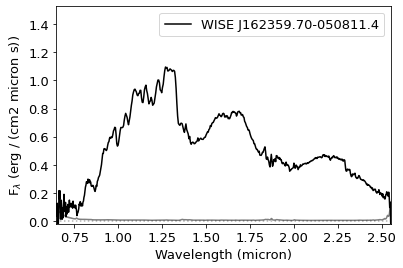

snr: 225.91327
star classification: [1]
RF hig classification: 0
The probability is [0.38083333 0.61916667]
RF hig Telluric class: 0
The probability is [0.34055556 0.65944444]


1

<Figure size 432x288 with 0 Axes>

In [10]:
splat_RFclass('J1623-0508',1,model=1)


Retrieving 1 file



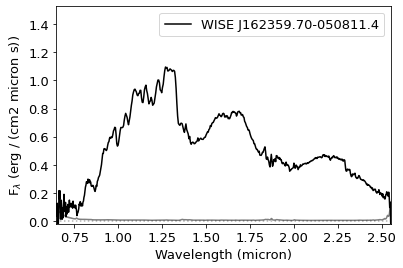

Bardalez types: [20.7, 35.5]
snr: 225.91327
multi output low classification: [20.33039193 27.96401349]
multi output mid classification: [20.99605031 32.54919129]
multi output hig classification: [20.94786575 31.90984852]


<Figure size 432x288 with 0 Axes>

In [10]:
sp0=sp.getSpectrum(shortname='J1623-0508')[0]
prim = 20.7
sec  = 35.5
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim,sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 2 files



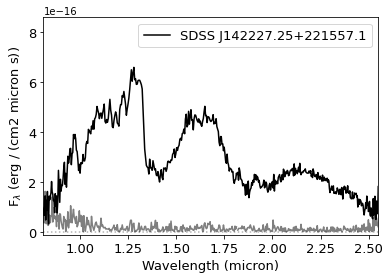

Bardalez types: [24.6, 31.6]
snr: 44.565437
multi output low classification: [23.18736346 31.61264931]
multi output mid classification: [23.50746987 32.12699471]
multi output hig classification: [23.85276567 32.08558025]


<Figure size 432x288 with 0 Axes>

In [11]:
sp0=sp.getSpectrum(shortname='J1422+2215')[0]
prim = 24.6
sec  = 31.6
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim, sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



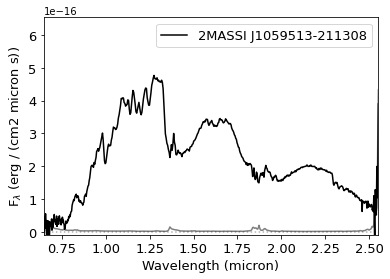

Bardalez types: [21.5, 32.3]
snr: 229.57288
multi output low classification: [20.87971567 29.67933759]
multi output mid classification: [20.99980832 30.10582127]
multi output hig classification: [20.99999895 30.35960823]


<Figure size 432x288 with 0 Axes>

In [12]:
sp0=sp.getSpectrum(shortname='J1059-2113')[0]
prim = 21.5
sec  = 32.3
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim,sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



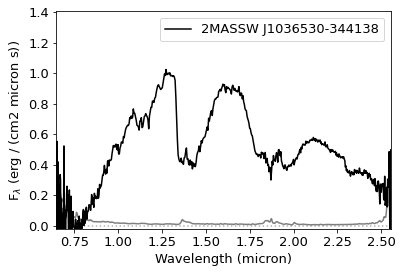

Bardalez types: [25.1, 31.1]
snr: 81.38876
multi output low classification: [27.35374383 29.14192861]
multi output mid classification: [28.26718066 28.96778459]
multi output hig classification: [27.96153908 29.04613008]


<Figure size 432x288 with 0 Axes>

In [13]:
sp0=sp.getSpectrum(shortname='J1036-3441')[0]
prim = 25.1
sec  = 31.1
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim,sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



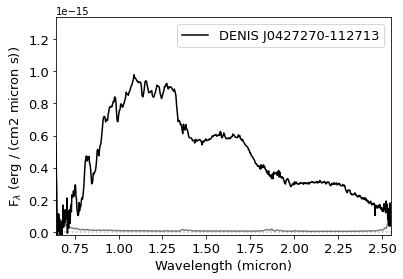

Bardalez types: [17.2, 32.5]
snr: 168.2534
multi output low classification: [16.89877778 25.20749544]
multi output mid classification: [17.03452358 23.72014055]
multi output hig classification: [17.5364095  32.12629098]


<Figure size 432x288 with 0 Axes>

In [14]:
sp0=sp.getSpectrum(shortname='J0427-1127')[0]
prim = 17.2
sec  = 32.5
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim,sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 2 files



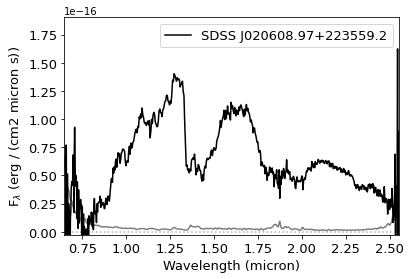

Bardalez types: [24.3, 31.5]
snr: 51.47586
multi output low classification: [25.17357496 30.03294124]
multi output mid classification: [26.11673951 29.44919845]
multi output hig classification: [26.13141182 29.47022566]


<Figure size 432x288 with 0 Axes>

In [15]:
sp0=sp.getSpectrum(shortname='J0206+2235')[1]
prim = 24.3
sec  = 31.5
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim,sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 3 files



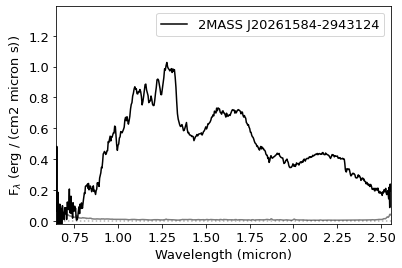

snr: 137.48973
star classification: [1]
RF hig classification: 1
The probability is [0.67 0.33]
RF hig Telluric class: 1
The probability is [0.59611111 0.40388889]


0

<Figure size 432x288 with 0 Axes>

In [11]:
splat_RFclass('J2026-2943',1,model=1)


Retrieving 3 files



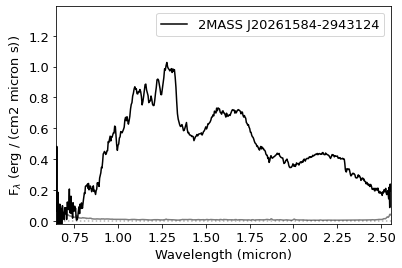

Bardalez types: [19.9, 35.9]
snr: 137.48973
multi output low classification: [20.33809582 29.32398523]
multi output mid classification: [21.00263103 34.92751148]
multi output hig classification: [21.01148148 34.83526543]


<Figure size 432x288 with 0 Axes>

In [16]:
sp0=sp.getSpectrum(shortname='J2026-2943')[0]
prim = 19.9
sec  = 35.9
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([prim,sec]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



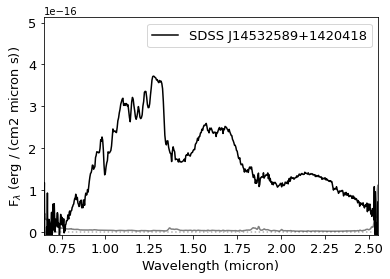

Bardalez types: [21.1, 36]
snr: 124.43043
multi output low classification: [20.87609663 33.54483041]
multi output mid classification: [21.04764237 34.22227914]
multi output hig classification: [21.07235582 32.35216093]


<Figure size 432x288 with 0 Axes>

In [17]:
sp0=sp.getSpectrum(shortname='J1453+1420')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([21.1, 36]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



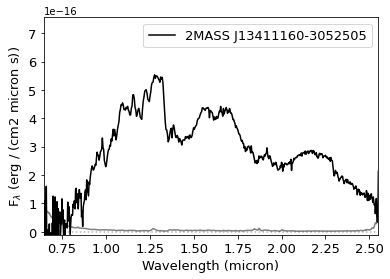

Bardalez types: [21.6, 36.5]
snr: 119.726845
multi output low classification: [21.46044762 27.28089906]
multi output mid classification: [21.78086388 29.27501607]
multi output hig classification: [21.43634176 31.64353843]


<Figure size 432x288 with 0 Axes>

In [18]:
sp0=sp.getSpectrum(shortname='J1341-3052')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([21.6, 36.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 2 files



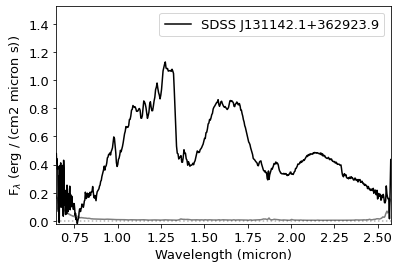

Bardalez types: [24.4, 32]
snr: 166.74747
multi output low classification: [24.15807931 30.8826045 ]
multi output mid classification: [24.2904491  31.18660342]
multi output hig classification: [24.81987688 31.17361501]


<Figure size 432x288 with 0 Axes>

In [19]:
sp0=sp.getSpectrum(shortname='J1311+3629')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([24.4, 32]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



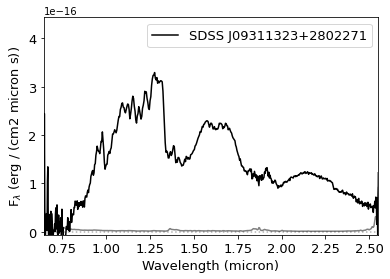

Bardalez types: [21.4, 31]
snr: 151.17033
multi output low classification: [20.98971296 33.25192853]
multi output mid classification: [21.0550546  33.18647359]
multi output hig classification: [21.14370503 33.01614866]


<Figure size 432x288 with 0 Axes>

In [20]:
sp0=sp.getSpectrum(shortname='J0931+2802')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([21.4, 31]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



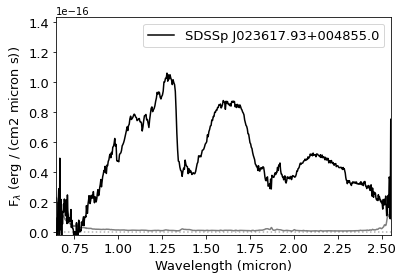

Bardalez types: [25.5, 31.5]
snr: 101.63012
multi output low classification: [25.58374603 29.3343848 ]
multi output mid classification: [27.97488706 29.25525849]
multi output hig classification: [28.55405868 29.81479319]


<Figure size 432x288 with 0 Axes>

In [21]:
sp0=sp.getSpectrum(shortname='J0236+0048')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Bardalez types: ' +str([25.5, 31.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))

Burgasser stars


Retrieving 1 file



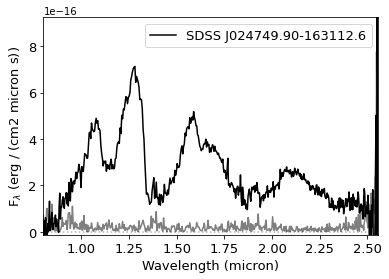

Burgasser types: [27.5, 36.5]
snr: 27.342545
multi output low classification: [29.20587053 35.64340252]
multi output mid classification: [28.9074828  36.01356835]
multi output hig classification: [28.38502381 36.19839587]


<Figure size 432x288 with 0 Axes>

In [23]:
sp0=sp.getSpectrum(shortname='J0247-1631')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([27.5, 36.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



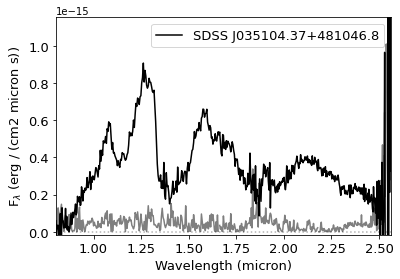

Burgasser types: [26, 34.5]
snr: 12.9441185
multi output low classification: [27.50082496 35.19300798]
multi output mid classification: [27.11203439 35.76955206]
multi output hig classification: [27.61579762 36.0069952 ]


<Figure size 432x288 with 0 Axes>

In [24]:
sp0=sp.getSpectrum(shortname='J0351+4810')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([26, 34.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 2 files



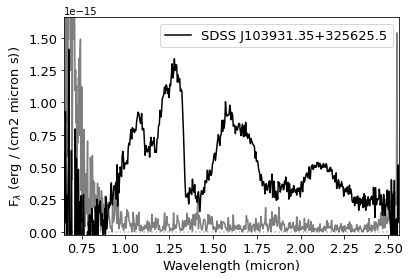

Burgasser types: [28, 34]
snr: 28.563902
multi output low classification: [29.45755022 32.60352993]
multi output mid classification: [29.69140741 32.79088801]
multi output hig classification: [29.00557937 33.52808907]


<Figure size 432x288 with 0 Axes>

In [25]:
sp0=sp.getSpectrum(shortname='J1039+3256')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([28, 34]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



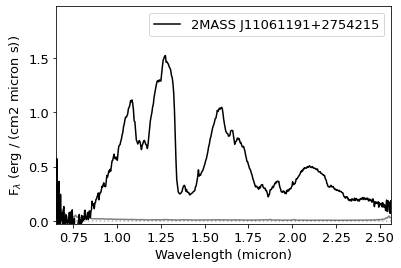

Burgasser types: [27.5, 34.5]
snr: 136.4455
multi output low classification: [29.86941968 33.08605388]
multi output mid classification: [29.95013889 33.73303557]
multi output hig classification: [30.00055556 33.54592949]


<Figure size 432x288 with 0 Axes>

In [26]:
sp0=sp.getSpectrum(shortname='J1106+2754')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([27.5, 34.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



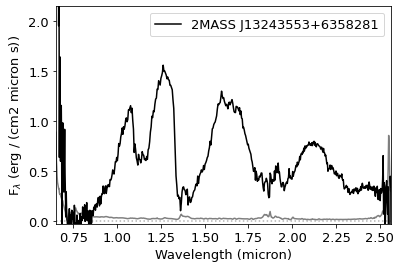

Burgasser types: [29, 34]
snr: 56.805206
multi output low classification: [31.4440534 32.9274925]
multi output mid classification: [31.75999427 33.43612698]
multi output hig classification: [29.50219577 33.90761023]


<Figure size 432x288 with 0 Axes>

In [27]:
sp0=sp.getSpectrum(shortname='J1324+6358')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([29, 34]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



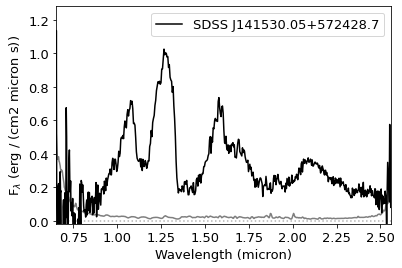

Burgasser types: [27.5, 35.5]
snr: 41.627354
multi output low classification: [29.55243399 35.94331832]
multi output mid classification: [29.82741005 35.87737614]
multi output hig classification: [31.79987787 35.98275963]


<Figure size 432x288 with 0 Axes>

In [28]:
sp0=sp.getSpectrum(shortname='J1415+5724')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([27.5, 35.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



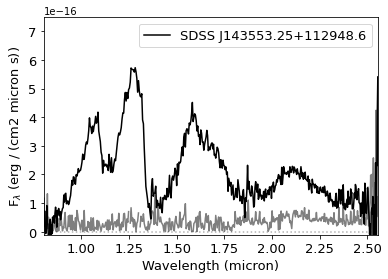

Burgasser types: [28, 36]
snr: 13.385793
multi output low classification: [29.51245474 34.62716922]
multi output mid classification: [30.25726014 36.07575159]
multi output hig classification: [29.62591843 36.21078571]


<Figure size 432x288 with 0 Axes>

In [29]:
sp0=sp.getSpectrum(shortname='J1435+1129')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([28, 36]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



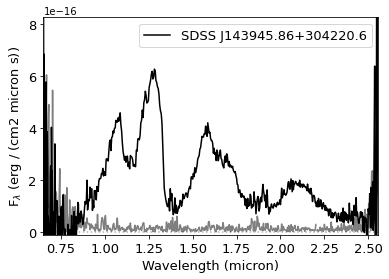

Burgasser types: [20, 35.5]
snr: 38.059574
multi output low classification: [30.68899881 33.82217403]
multi output mid classification: [29.98172354 35.4793763 ]
multi output hig classification: [30.47346561 34.02286817]


<Figure size 432x288 with 0 Axes>

In [30]:
sp0=sp.getSpectrum(shortname='J1439+3042')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([20, 35.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))

In [ ]:
bardalez_stars =['J0236+0048','J1341-3052','J1453+1420','J1036-3441','J1059-2113','J1707-0138']
burgasser_stars=['J0247-1631','J0351+4810','J1039+3256','J1106+2754','J1324+6358','J1415+5724','J1435+1129','J1439+3042','J1511+0607','J0119+2403','J0758+3247','J0909+6525']


Retrieving 2 files



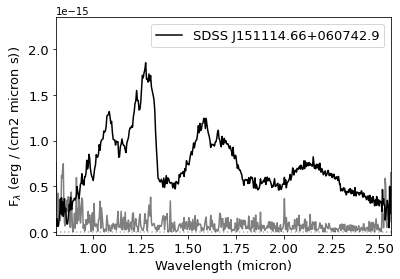

Burgasser types: [25, 35.5]
snr: 17.09241
multi output low classification: [26.66542174 34.97599399]
multi output mid classification: [26.47648942 35.39164192]
multi output hig classification: [26.92361552 35.64656786]


<Figure size 432x288 with 0 Axes>

In [31]:
sp0=sp.getSpectrum(shortname='J1511+0607')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([25, 35.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



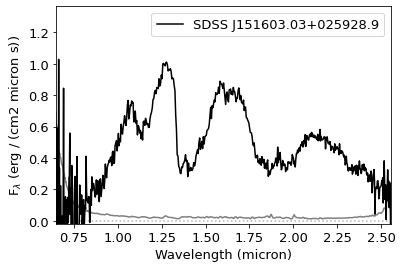

Burgasser types: [26.5, 32.5]
snr: 40.262337
multi output low classification: [28.29358951 30.68474483]
multi output mid classification: [28.21105935 31.9639224 ]
multi output hig classification: [27.95425573 32.9013931 ]


<Figure size 432x288 with 0 Axes>

In [32]:
sp0=sp.getSpectrum(shortname='J1516+0259')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([26.5, 32.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



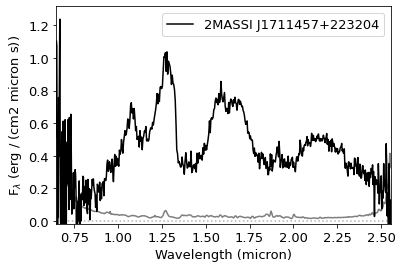

Burgasser types: [25, 35.5]
snr: 29.382591
multi output low classification: [26.78075132 35.47850279]
multi output mid classification: [26.88932275 36.33754862]
multi output hig classification: [27.05941138 36.3769828 ]


<Figure size 432x288 with 0 Axes>

In [33]:
sp0=sp.getSpectrum(shortname='J1711+2232')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([25, 35.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 2 files



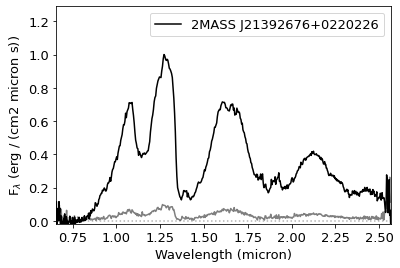

Burgasser types: [29.5, 34]
snr: 11.535254
multi output low classification: [29.91604978 34.44325287]
multi output mid classification: [30.82745118 35.3178989 ]
multi output hig classification: [31.50652389 36.00864058]


<Figure size 432x288 with 0 Axes>

In [34]:
sp0=sp.getSpectrum(shortname='J2139+0220')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([29.5, 34]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



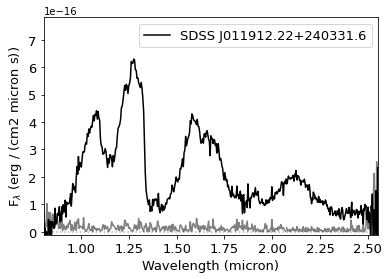

Burgasser types: [20, 34]
snr: 27.794813
multi output low classification: [30.27023734 33.33887995]
multi output mid classification: [31.10518771 33.37715476]
multi output hig classification: [31.89066739 33.45504762]


<Figure size 432x288 with 0 Axes>

In [35]:
sp0=sp.getSpectrum(shortname='J0119+2403')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([20, 34]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



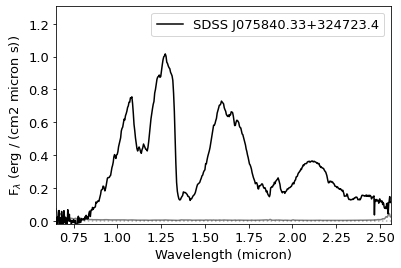

Burgasser types: [27.5, 34]
snr: 207.84184
multi output low classification: [31.01182187 32.94240718]
multi output mid classification: [32.33028439 33.34093543]
multi output hig classification: [33.         33.00833333]


<Figure size 432x288 with 0 Axes>

In [36]:
sp0=sp.getSpectrum(shortname='J0758+3247')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([27.5, 34]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



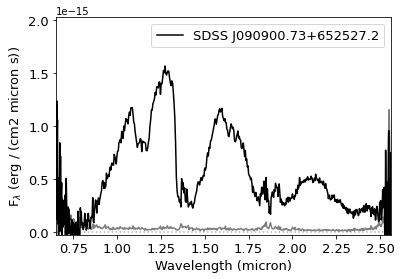

Burgasser types: [21.5, 32.5]
snr: 39.101887
multi output low classification: [30.24279838 31.86452834]
multi output mid classification: [30.74628792 31.6262392 ]
multi output hig classification: [30.29434921 31.75060698]


<Figure size 432x288 with 0 Axes>

In [37]:
sp0=sp.getSpectrum(shortname='J0909+6525')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([21.5, 32.5]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 2 files



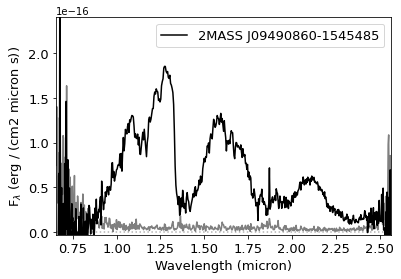

Burgasser types: [31, 32]
snr: 35.888992
multi output low classification: [30.95589286 32.11646265]
multi output mid classification: [29.21847354 32.7673139 ]
multi output hig classification: [30.87707407 32.94071955]


<Figure size 432x288 with 0 Axes>

In [38]:
sp0=sp.getSpectrum(shortname='J0949-1545')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([31, 32]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



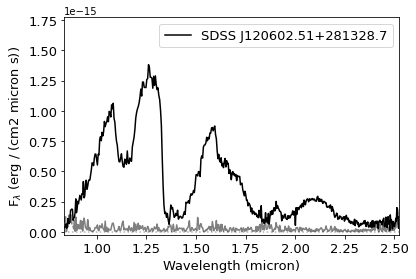

Burgasser types: [32, 35]
snr: 46.75806
multi output low classification: [32.02275    33.74474118]
multi output mid classification: [32.16724559 33.1166494 ]
multi output hig classification: [31.64694136 33.10822972]


<Figure size 432x288 with 0 Axes>

In [39]:
sp0=sp.getSpectrum(shortname='J1206+2813')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([32, 35]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



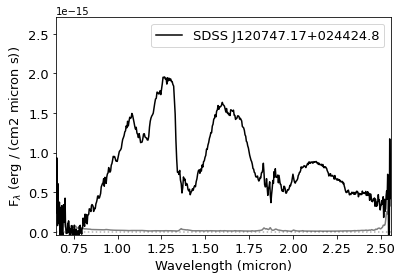

Burgasser types: [26.5, 33]
snr: 139.81573
multi output low classification: [28.02680503 31.05447591]
multi output mid classification: [29.60895767 30.78758685]
multi output hig classification: [29.93533069 30.09808181]


<Figure size 432x288 with 0 Axes>

In [40]:
sp0=sp.getSpectrum(shortname='J1207+0244')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([26.5, 33]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 3 files



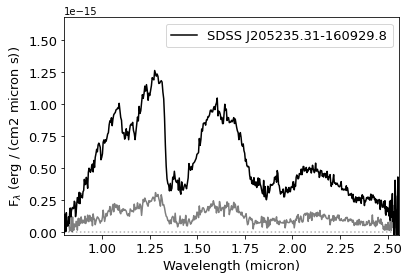

Burgasser types: [27, 32]
snr: 4.5932612
multi output low classification: [28.69935053 31.13787141]
multi output mid classification: [29.01257275 31.21140674]
multi output hig classification: [28.91182407 31.24360821]


<Figure size 432x288 with 0 Axes>

In [42]:
sp0=sp.getSpectrum(shortname='J2052-1609')[0]
sp0.plot()
wave0  = sp0.wave.value
flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
print('Burgasser types: ' +str([27, 32]))
flux0, noise0 = normalize(wave, flux0, noise0)
print('snr: '+str(measureSN(wave, flux0, noise0, rng=[1.2, 1.35])))
print('multi output low classification: ' +str(mo_low.predict([flux0])[0]))
print('multi output mid classification: ' +str(mo_mid.predict([flux0])[0]))
print('multi output hig classification: ' +str(mo_hig.predict([flux0])[0]))


Retrieving 1 file



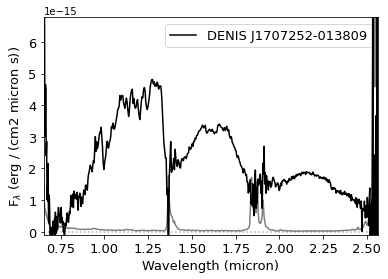

J1707-0138
snr: 110.734535
star classification: [21.0]
RF hig classification: 0
The probability is [0.66361111 0.33638889]
RF hig Telluric class: 0
The probability is [0.73222222 0.26777778]



Retrieving 1 file



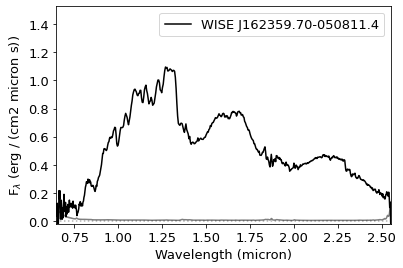

J1623-0508
snr: 225.91327
star classification: [21.0]
RF hig classification: 0
The probability is [0.90588889 0.09411111]
RF hig Telluric class: 0
The probability is [0.90444444 0.09555556]



Retrieving 2 files



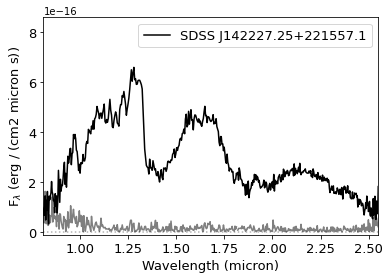

J1422+2215
snr: 44.565437
star classification: [21.0]
RF low classification: 0
The probability is [0.55388889 0.44611111]
RF low Telluric class: 0
The probability is [0.51666667 0.48333333]
RF low G1 classification: 0
The probability is [0.775 0.225]
RF low Telluric G1 class: 0
The probability is [0.78083333 0.21916667]



Retrieving 1 file



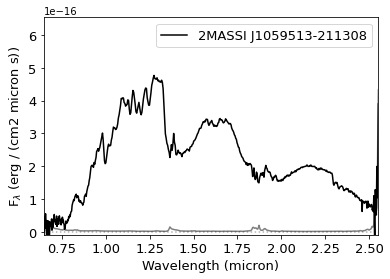

J1059-2113
snr: 229.57288
star classification: [21.0]
RF hig classification: 0
The probability is [0.84888889 0.15111111]
RF hig Telluric class: 0
The probability is [0.87138889 0.12861111]



Retrieving 1 file



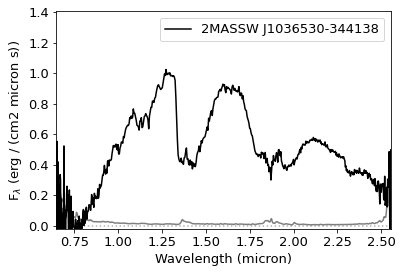

J1036-3441
snr: 81.38876
star classification: [29.0]
RF mid classification: 1
The probability is [0.45322222 0.54677778]
RF mid Telluric class: 1
The probability is [0.42555556 0.57444444]



Retrieving 1 file



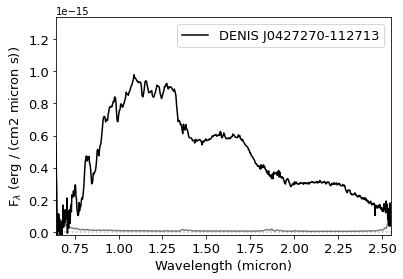

J0427-1127
snr: 168.2534
star classification: [18.0]
RF hig classification: 0
The probability is [0.78988889 0.21011111]
RF hig Telluric class: 0
The probability is [0.76333333 0.23666667]



Retrieving 2 files



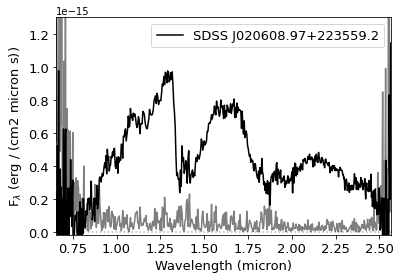

J0206+2235
snr: 12.804855
star classification: [29.0]
RF low classification: 0
The probability is [0.63111111 0.36888889]
RF low Telluric class: 0
The probability is [0.62944444 0.37055556]
RF low G2 classification: 0
The probability is [0.77 0.23]
RF low Telluric G2 class: 0
The probability is [0.74333333 0.25666667]



Retrieving 3 files



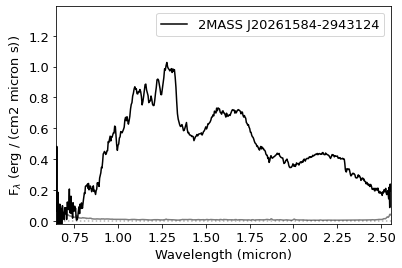

J2026-2943
snr: 137.48973
star classification: [21.0]
RF hig classification: 1
The probability is [0.47777778 0.52222222]
RF hig Telluric class: 1
The probability is [0.45388889 0.54611111]



Retrieving 1 file



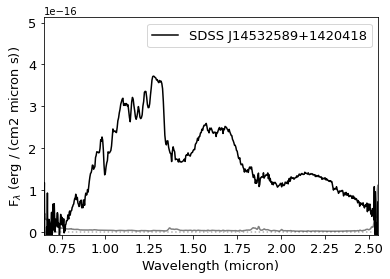

J1453+1420
snr: 124.43043
star classification: [21.0]
RF hig classification: 1
The probability is [0.305 0.695]
RF hig Telluric class: 1
The probability is [0.27222222 0.72777778]



Retrieving 1 file



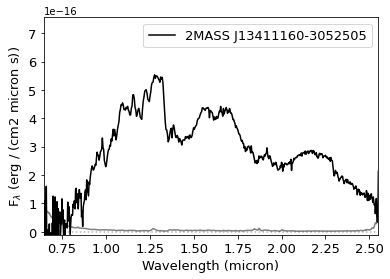

J1341-3052
snr: 119.726845
star classification: [21.0]
RF hig classification: 1
The probability is [0.41833333 0.58166667]
RF hig Telluric class: 1
The probability is [0.435 0.565]



Retrieving 2 files



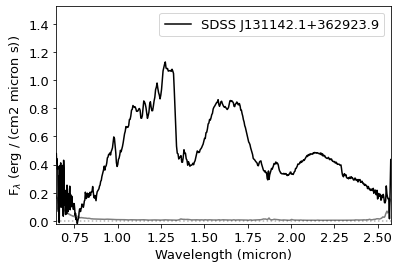

J1311+3629
snr: 166.74747
star classification: [30.0]
RF hig classification: 1
The probability is [0.32305556 0.67694444]
RF hig Telluric class: 1
The probability is [0.38083333 0.61916667]



Retrieving 1 file



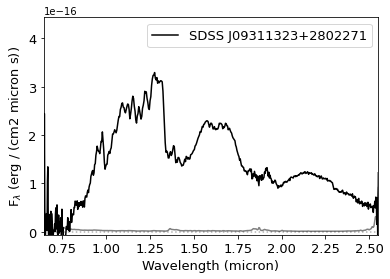

J0931+2802
snr: 151.17033
star classification: [21.0]
RF hig classification: 1
The probability is [0.21555556 0.78444444]
RF hig Telluric class: 1
The probability is [0.195 0.805]



Retrieving 1 file



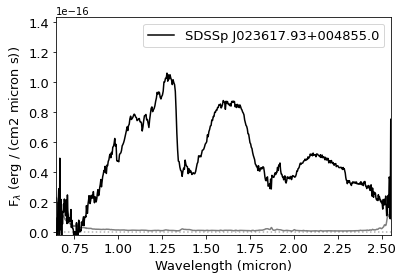

J0236+0048
snr: 101.63012
star classification: [30.0]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [0.99833333 0.00166667]



Retrieving 1 file



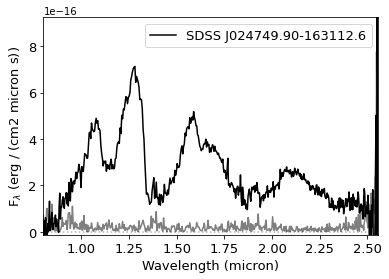

J0247-1631
snr: 27.342545
star classification: [31.0]
RF low classification: 1
The probability is [0.01 0.99]
RF low Telluric class: 1
The probability is [0. 1.]
RF low G2 classification: 1
The probability is [0.00333333 0.99666667]
RF low Telluric G2 class: 1
The probability is [0.01 0.99]



Retrieving 1 file



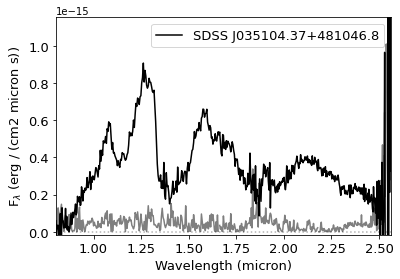

J0351+4810
snr: 12.9441185
star classification: [29.0]
RF low classification: 1
The probability is [0.01 0.99]
RF low Telluric class: 1
The probability is [0.00111111 0.99888889]
RF low G2 classification: 1
The probability is [0. 1.]
RF low Telluric G2 class: 1
The probability is [0. 1.]



Retrieving 2 files



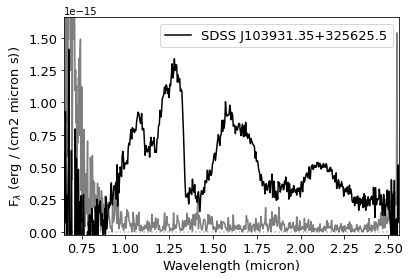

J1039+3256
snr: 28.563902
star classification: [31.0]
RF low classification: 1
The probability is [0.235 0.765]
RF low Telluric class: 1
The probability is [0.26916667 0.73083333]
RF low G2 classification: 1
The probability is [0.27 0.73]
RF low Telluric G2 class: 1
The probability is [0.23 0.77]



Retrieving 1 file



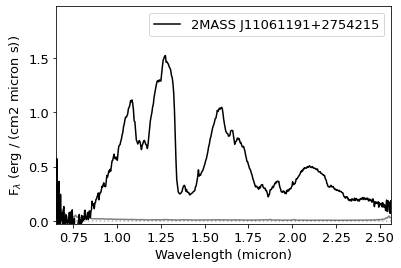

J1106+2754
snr: 136.4455
star classification: [32.0]
RF hig classification: 1
The probability is [0.00333333 0.99666667]
RF hig Telluric class: 1
The probability is [0.01 0.99]



Retrieving 1 file



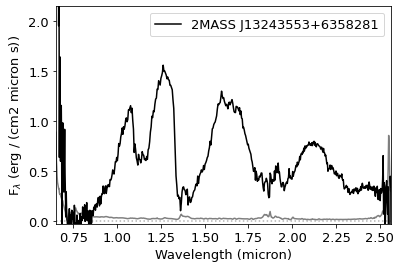

J1324+6358
snr: 56.805206
star classification: [30.0]
RF mid classification: 0
The probability is [1. 0.]
RF mid Telluric class: 0
The probability is [1. 0.]



Retrieving 1 file



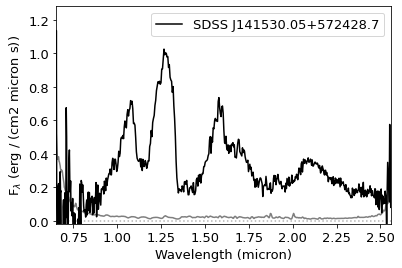

J1415+5724
snr: 41.627354
star classification: [32.0]
RF low classification: 1
The probability is [0.01 0.99]
RF low Telluric class: 1
The probability is [0. 1.]
RF low G2 classification: 1
The probability is [0. 1.]
RF low Telluric G2 class: 1
The probability is [0.00166667 0.99833333]



Retrieving 1 file



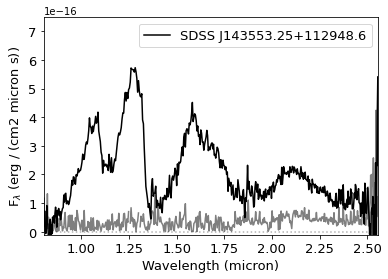

J1435+1129
snr: 13.385793
star classification: [32.0]
RF low classification: 1
The probability is [0.085 0.915]
RF low Telluric class: 1
The probability is [0.05 0.95]
RF low G2 classification: 1
The probability is [0.05666667 0.94333333]
RF low Telluric G2 class: 1
The probability is [0.075 0.925]



Retrieving 1 file



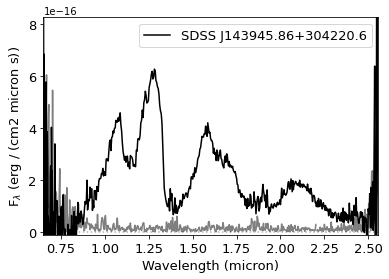

J1439+3042
snr: 38.059574
star classification: [33.0]
RF low classification: 0
The probability is [0.53277778 0.46722222]
RF low Telluric class: 1
The probability is [0.49888889 0.50111111]
RF low G3 classification: 0
The probability is [0.62416667 0.37583333]
RF low Telluric G3 class: 0
The probability is [0.71 0.29]



Retrieving 2 files



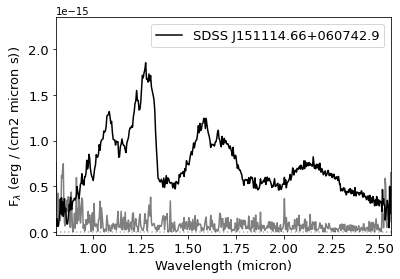

J1511+0607
snr: 17.09241
star classification: [30.0]
RF low classification: 1
The probability is [0.00666667 0.99333333]
RF low Telluric class: 1
The probability is [0.00333333 0.99666667]
RF low G2 classification: 1
The probability is [0. 1.]
RF low Telluric G2 class: 1
The probability is [0. 1.]



Retrieving 1 file



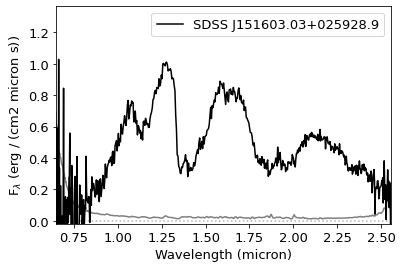

J1516+0259
snr: 40.262337
star classification: [29.0]
RF low classification: 0
The probability is [0.825 0.175]
RF low Telluric class: 0
The probability is [0.79333333 0.20666667]
RF low G2 classification: 0
The probability is [0.755 0.245]
RF low Telluric G2 class: 0
The probability is [0.77888889 0.22111111]



Retrieving 1 file



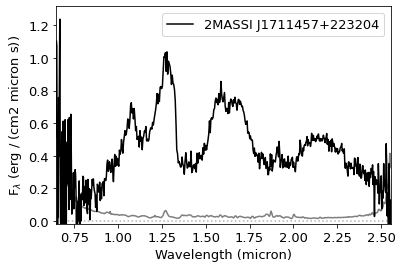

J1711+2232
snr: 29.382591
star classification: [25.0]
RF low classification: 1
The probability is [0.07055556 0.92944444]
RF low Telluric class: 1
The probability is [0.08666667 0.91333333]
RF low G1 classification: 1
The probability is [0.05 0.95]
RF low Telluric G1 class: 1
The probability is [0.04 0.96]



Retrieving 2 files



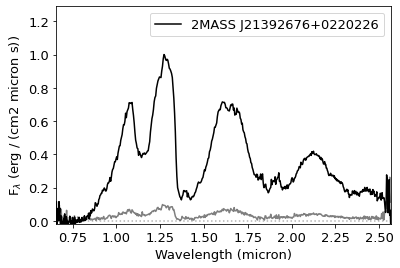

J2139+0220
snr: 11.535254
star classification: [32.0]
RF low classification: 1
The probability is [0.34722222 0.65277778]
RF low Telluric class: 1
The probability is [0.29472222 0.70527778]
RF low G2 classification: 1
The probability is [0.28583333 0.71416667]
RF low Telluric G2 class: 1
The probability is [0.32277778 0.67722222]



Retrieving 1 file



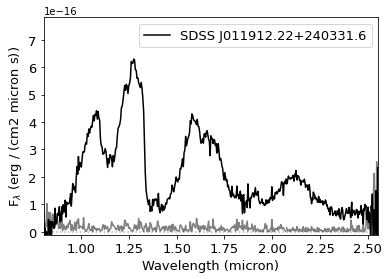

J0119+2403
snr: 27.794813
star classification: [32.0]
RF low classification: 0
The probability is [0.55833333 0.44166667]
RF low Telluric class: 0
The probability is [0.57833333 0.42166667]
RF low G2 classification: 0
The probability is [0.56166667 0.43833333]
RF low Telluric G2 class: 0
The probability is [0.56833333 0.43166667]



Retrieving 1 file



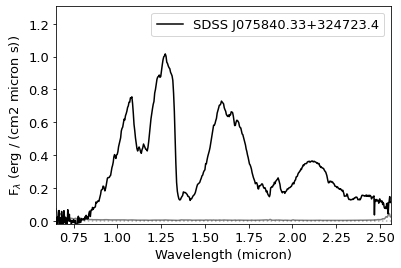

J0758+3247
snr: 207.84184
star classification: [32.0]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]



Retrieving 1 file



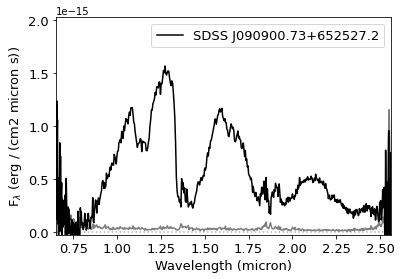

J0909+6525
snr: 39.101887
star classification: [32.0]
RF low classification: 0
The probability is [0.80555556 0.19444444]
RF low Telluric class: 0
The probability is [0.82833333 0.17166667]
RF low G2 classification: 0
The probability is [0.86416667 0.13583333]
RF low Telluric G2 class: 0
The probability is [0.905 0.095]



Retrieving 2 files



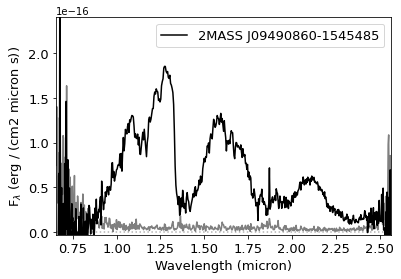

J0949-1545
snr: 35.888992
star classification: [32.0]
RF low classification: 0
The probability is [0.89222222 0.10777778]
RF low Telluric class: 0
The probability is [0.89388889 0.10611111]
RF low G2 classification: 0
The probability is [0.75 0.25]
RF low Telluric G2 class: 0
The probability is [0.83111111 0.16888889]



Retrieving 1 file



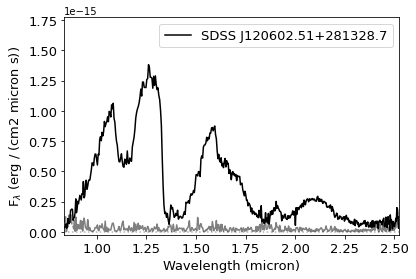

J1206+2813
snr: 46.75806
star classification: [34.0]
RF low classification: 0
The probability is [0.80388889 0.19611111]
RF low Telluric class: 0
The probability is [0.73277778 0.26722222]
RF low G3 classification: 0
The probability is [0.80666667 0.19333333]
RF low Telluric G3 class: 0
The probability is [0.81 0.19]



Retrieving 1 file



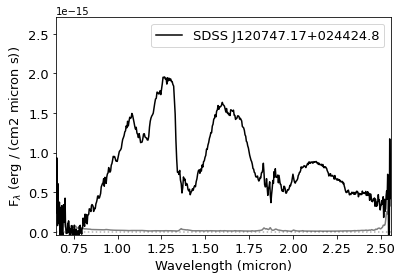

J1207+0244
snr: 139.81573
star classification: [30.0]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]



Retrieving 1 file



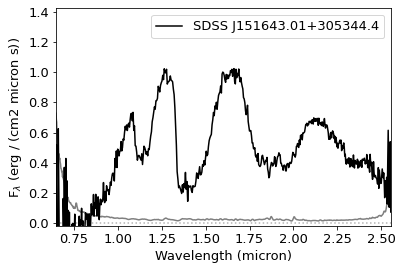

J1516+3053
snr: 39.422367
star classification: [29.0]
RF low classification: 0
The probability is [0.99666667 0.00333333]
RF low Telluric class: 0
The probability is [1. 0.]
RF low G2 classification: 0
The probability is [0.99333333 0.00666667]
RF low Telluric G2 class: 0
The probability is [1. 0.]



Retrieving 3 files



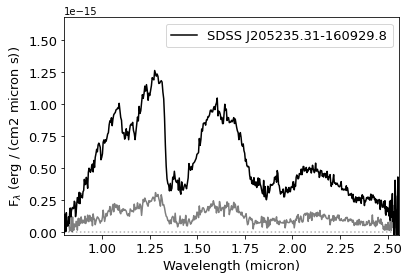

J2052-1609
snr: 4.5932612
star classification: [31.0]
RF low classification: 0
The probability is [0.59416667 0.40583333]
RF low Telluric class: 0
The probability is [0.58222222 0.41777778]
RF low G2 classification: 0
The probability is [0.67111111 0.32888889]
RF low Telluric G2 class: 0
The probability is [0.58666667 0.41333333]




0.45454545454545453

<Figure size 432x288 with 0 Axes>

In [12]:
all_stars = bardalez_stars+burgasser_stars
preds_BB = []
for star_i in all_stars:
    preds_BB.append(splat_RFclass(star_i,1,model=1))
np.mean(preds_BB)

In [36]:
preds_BB.count(1)

15

In [52]:
def standards_RFclass(stnd,classif,model=1):
    tm = np.logical_or(np.logical_and(wave > 1.35,wave < 1.42), np.logical_and(wave > 1.8,wave < 1.95))
    
    sp0=sp.getStandard(stnd)
    sp0.plot()
    wave0  = sp0.wave.value
    flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
    noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
    flux0, noise0 = normalize(wave, flux0, noise0)
    fluxT = flux0[~tm]
    noiseT = noise0[~tm]
    SNR = measureSN(wave, flux0, noise0, rng=[1.2, 1.35])
    print('snr: '+str(SNR))
    print('Standard: ' +str([stnd]))
    if SNR<50:
        print('RF low classification: ' +str(rf_low.predict([flux0])[0]) + '\nThe probability is ' +str(rf_low.predict_proba([flux0])[0]))
        print('RF low Telluric class: ' +str(rf_low_T.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_low_T.predict_proba([fluxT])[0]))
        pred = rf_low.predict([flux0])[0]
    elif SNR>100:
        print('RF hig classification: ' +str(rf_hig.predict([flux0])[0]) + '\nThe probability is ' +str(rf_hig.predict_proba([flux0])[0]))
        print('RF hig Telluric class: ' +str(rf_hig_T.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_hig_T.predict_proba([fluxT])[0]))
        pred = rf_hig.predict([flux0])[0]
    else:
        print('RF mid classification: ' +str(rf_mid.predict([flux0])[0]) + '\nThe probability is ' +str(rf_mid.predict_proba([flux0])[0]))
        print('RF mid Telluric class: ' +str(rf_mid_T.predict([fluxT])[0]) + '\nThe probability is ' +str(rf_mid_T.predict_proba([fluxT])[0]))
        pred = rf_mid.predict([flux0])[0]
    return pred

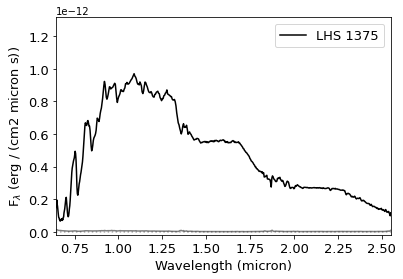

snr: 221.79976
Standard: [16]
RF hig classification: 0
The probability is [0.99333333 0.00666667]
RF hig Telluric class: 0
The probability is [0.99333333 0.00666667]


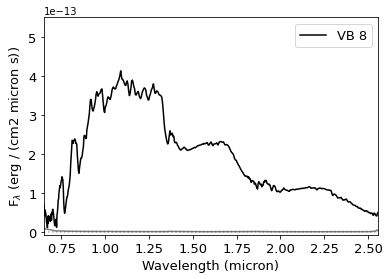

snr: 608.29175
Standard: [17]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]


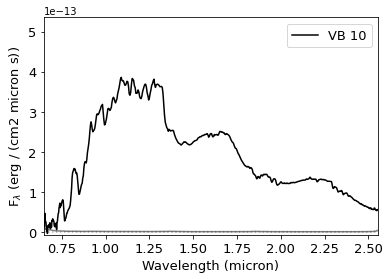

snr: 570.9576
Standard: [18]
RF hig classification: 0
The probability is [0.83111111 0.16888889]
RF hig Telluric class: 0
The probability is [0.80277778 0.19722222]


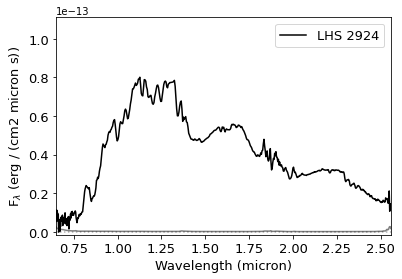

snr: 390.9227
Standard: [19]
RF hig classification: 0
The probability is [0.65327778 0.34672222]
RF hig Telluric class: 0
The probability is [0.62388889 0.37611111]


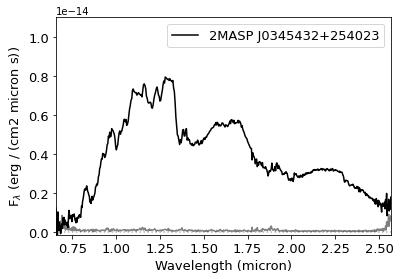

snr: 87.22767
Standard: [20]
RF mid classification: 1
The probability is [0.40583333 0.59416667]
RF mid Telluric class: 1
The probability is [0.49222222 0.50777778]


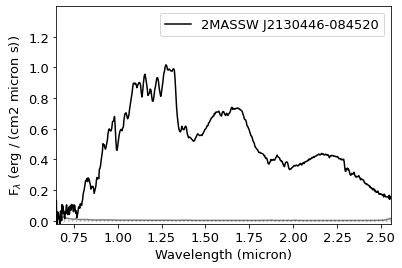

snr: 268.4838
Standard: [21]
RF hig classification: 0
The probability is [0.64333333 0.35666667]
RF hig Telluric class: 0
The probability is [0.67555556 0.32444444]


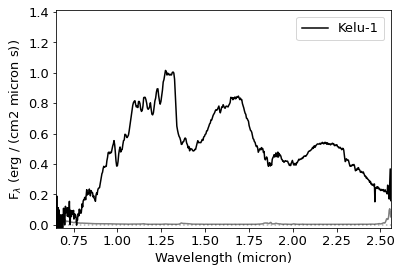

snr: 224.53766
Standard: [22]
RF hig classification: 0
The probability is [0.83444444 0.16555556]
RF hig Telluric class: 0
The probability is [0.8825 0.1175]


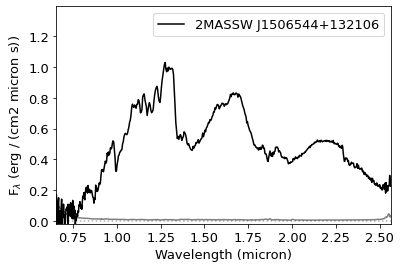

snr: 130.8242
Standard: [23]
RF hig classification: 0
The probability is [0.985 0.015]
RF hig Telluric class: 0
The probability is [0.98666667 0.01333333]


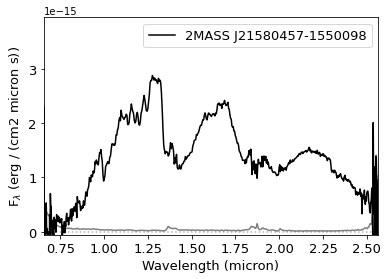

snr: 102.274635
Standard: [24]
RF hig classification: 0
The probability is [0.99666667 0.00333333]
RF hig Telluric class: 0
The probability is [0.99333333 0.00666667]


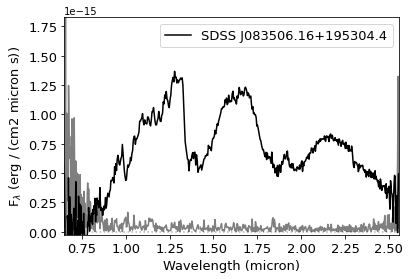

snr: 34.667553
Standard: [25]
RF low classification: 0
The probability is [0.75694444 0.24305556]
RF low Telluric class: 0
The probability is [0.71666667 0.28333333]


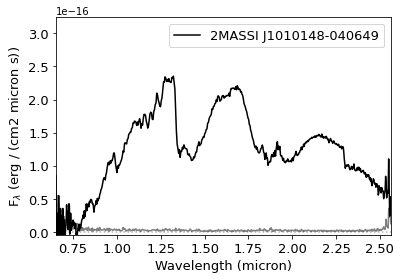

snr: 81.36375
Standard: [26]
RF mid classification: 1
The probability is [0.22666667 0.77333333]
RF mid Telluric class: 1
The probability is [0.18444444 0.81555556]


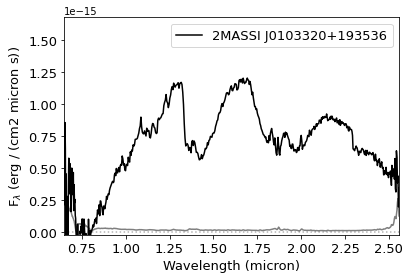

snr: 79.7967
Standard: [27]
RF mid classification: 1
The probability is [0.06333333 0.93666667]
RF mid Telluric class: 1
The probability is [0.05888889 0.94111111]


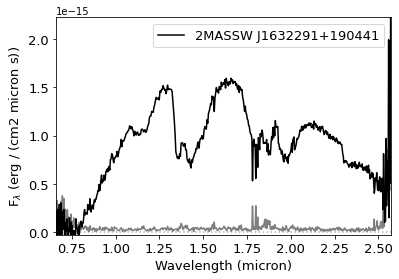

snr: 48.91993
Standard: [28]
RF low classification: 0
The probability is [0.92555556 0.07444444]
RF low Telluric class: 0
The probability is [0.93333333 0.06666667]


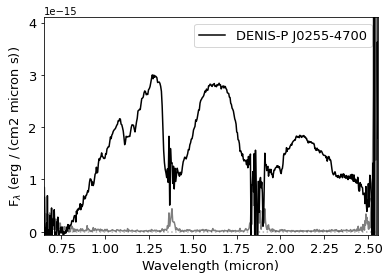

snr: 140.30652
Standard: [29]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]


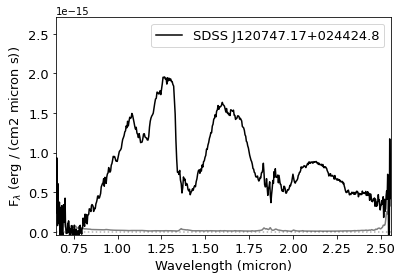

snr: 139.81573
Standard: [30]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]


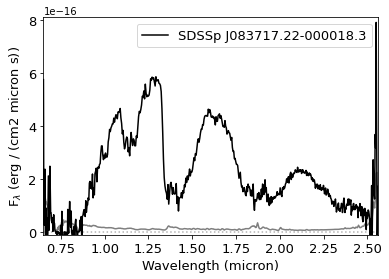

snr: 54.17787
Standard: [31]
RF mid classification: 0
The probability is [0.71088889 0.28911111]
RF mid Telluric class: 0
The probability is [0.72916667 0.27083333]


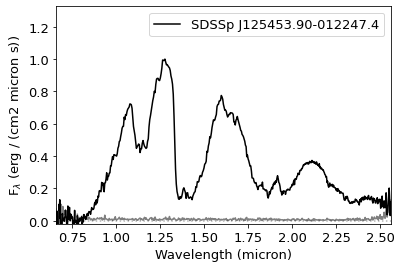

snr: 82.03343
Standard: [32]
RF mid classification: 0
The probability is [0.69233333 0.30766667]
RF mid Telluric class: 0
The probability is [0.69861111 0.30138889]


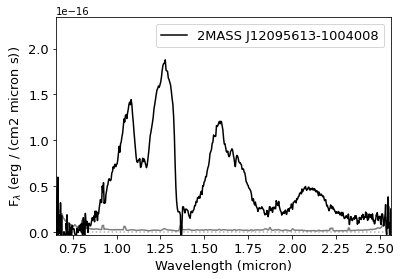

snr: 78.7631
Standard: [33]
RF mid classification: 0
The probability is [1. 0.]
RF mid Telluric class: 0
The probability is [1. 0.]


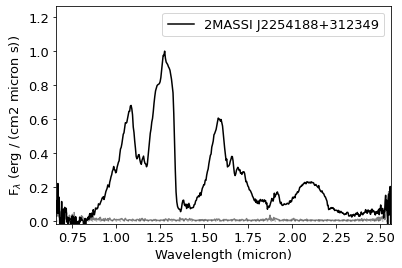

snr: 179.20729
Standard: [34]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]


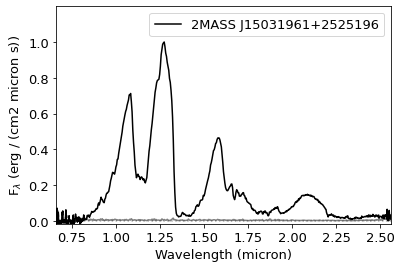

snr: 151.02148
Standard: [35]
RF hig classification: 0
The probability is [1. 0.]
RF hig Telluric class: 0
The probability is [1. 0.]


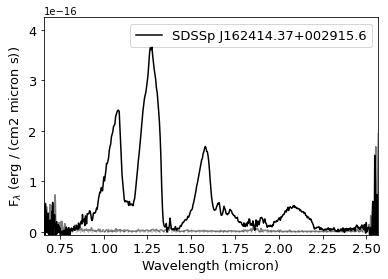

snr: 89.01971
Standard: [36]
RF mid classification: 0
The probability is [0.515 0.485]
RF mid Telluric class: 0
The probability is [0.50166667 0.49833333]


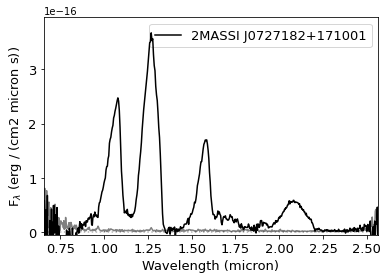

snr: 96.21638
Standard: [37]
RF mid classification: 0
The probability is [0.99333333 0.00666667]
RF mid Telluric class: 0
The probability is [0.99666667 0.00333333]


0.13636363636363635

<Figure size 432x288 with 0 Axes>

In [53]:
preds_standards = []
for star_i in range(16,38):
    preds_standards.append(standards_RFclass(star_i,0,model=1))
np.mean(preds_standards)

In [38]:
preds_standards.count(1)

3

In [39]:
preds_standards.count(0)

19

BINARIES INDENTIFICATION PRECISION

In [46]:
precision_1=(15/33)/((15/33)+(3/22))
print('1: precision: ' +str(precision_1))

1: precision: 0.7692307692307693


In [47]:
recall_1=(15/33)
print('1: recall: ' +str(recall_1))

1: recall: 0.45454545454545453


In [48]:
f1score_1=2*precision_1*recall_1/(precision_1+recall_1)
print('1: f1-score: ' +str(f1score_1))

1: f1-score: 0.5714285714285714


SINGLES IDENTIFICATION PRECISION

In [49]:
precision_0=(19/22)/((19/22)+(18/33))
print('0: precision: ' +str(precision_0))

0: precision: 0.6129032258064516


In [50]:
recall_0=(19/22)
print('0: recall: ' +str(recall_0))

0: recall: 0.8636363636363636


In [51]:
f1score_0=2*precision_0*recall_0/(precision_0+recall_0)
print('0: f1-score: ' +str(f1score_0))

0: f1-score: 0.7169811320754716
